# <div class="alert alert-danger" >  Expanding </div>

Expanding is the task of taking a shorter piece of text, 
such as a set of instructions or a list of topics, 
and having the large language model generate a 
longer piece of text, such as an email or 
an essay about some topic. There are some great uses of this, 
such as if you use a large language model as a brainstorming partner. 

But I just also want to acknowledge that there's 
some problematic use cases of this, such as if someone were to use it, they 
generate a large amount of spam. So, when you use these capabilities of 
a large language model, please use it only in 
a responsible way, and in a way that helps people.


In this lesson we'll go through an example of how you can 
use a language model to generate a personalized 
email based on some information. The 
email is kind of self-proclaimed to be from an AI bot which, as Andrew 
mentioned, is very important.

`In this lesson, you will generate customer service emails that are tailored to each customer's review.`

We're also going 
to use another one of the model's input parameters called 
<b>"temperature"</b> and this kind of allows you to vary 
the kind of degree of exploration and variety 
in the kind of model's responses. So let's get into it! 

### <div class="alert alert-success" > Setup
    
    
So before we get started we're going to kind of do the 
usual setup. So set up the OpenAI Python package and then also define 
our helper function "get_completion".   

In [1]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAI_API_KEY')

In [2]:
def get_completion(prompt, model="gpt-3.5-turbo",temperature=0): # Andrew mentioned that the prompt/ completion paradigm is preferable for this class
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

### <div class="alert alert-info" > Customize the automated reply to a customer email
    
 
And now we're going to write a custom email response to 
a customer review and so given a customer review and the sentiment 
we're going to generate a custom response. Now we're 
going to use the language model to generate a custom 
email to a customer based on a customer 
review and the sentiment of the review. So we've already 
extracted the sentiment using the kind of prompts that we saw 
in the inferring video and then this is the customer review for 
a blender.
    
    

In [3]:
# given the sentiment from the lesson on "inferring",
# and the original customer message, customize the email
sentiment = "negative"

# review for a blender
review = f"""
So, they still had the 17 piece system on seasonal \
sale for around $49 in the month of November, about \
half off, but for some reason (call it price gouging) \
around the second week of December the prices all went \
up to about anywhere from between $70-$89 for the same \
system. And the 11 piece system went up around $10 or \
so in price also from the earlier sale price of $29. \
So it looks okay, but if you look at the base, the part \
where the blade locks into place doesn’t look as good \
as in previous editions from a few years ago, but I \
plan to be very gentle with it (example, I crush \
very hard items like beans, ice, rice, etc. in the \ 
blender first then pulverize them in the serving size \
I want in the blender then switch to the whipping \
blade for a finer flour, and use the cross cutting blade \
first when making smoothies, then use the flat blade \
if I need them finer/less pulpy). Special tip when making \
smoothies, finely cut and freeze the fruits and \
vegetables (if using spinach-lightly stew soften the \ 
spinach then freeze until ready for use-and if making \
sorbet, use a small to medium sized food processor) \ 
that you plan to use that way you can avoid adding so \
much ice if at all-when making your smoothie. \
After about a year, the motor was making a funny noise. \
I called customer service but the warranty expired \
already, so I had to buy another one. FYI: The overall \
quality has gone done in these types of products, so \
they are kind of counting on brand recognition and \
consumer loyalty to maintain sales. Got it in about \
two days.
"""

And now we're going to customize the reply 
based on the sentiment. 

In [4]:
prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for \
their review.
If the sentiment is negative, apologize and suggest that \
they can reach out to customer service. 
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""
# response = get_completion(prompt)
# print(response)

When you're using a language model to 
generate text that you're going to show to a user, it's very important 
to have explicitly say it was generated by AI AS we did here as 'AI customer agent'. This kind of transparency in letting 
the user know that the text they're seeing was generated 
by AI is ethical and important. 

And then we'll just input the customer review 
and the review sentiment. And also note that this  part: `Review sentiment: {sentiment}` isn't necessarily 
important because we could actually use this prompt to 
also extract the review sentiment and then in a follow-up step write 
the email. But just for the sake of the example, well, we've already 
extracted the sentiment from the review. And so, here we have a 
response to the customer.

<b>Output</b>

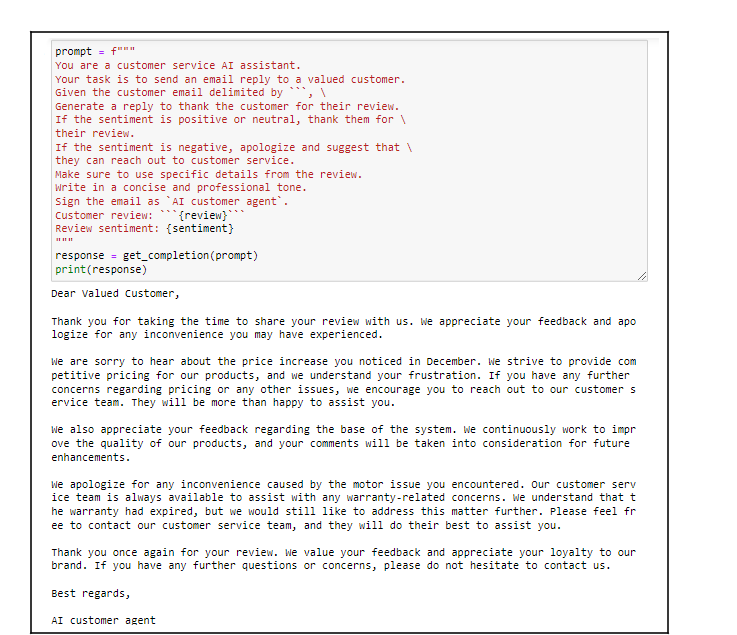


It addresses details that 
the customer mentioned in their review. 
And kind of as we instructed, suggests that they reach 
out to customer service because this is just 
an AI customer service agent. 

### <div class="alert alert-info" >Remind the model to use details from the customer's email</div>

Next, we're going to use a parameter of the language model called 
"temperature" that will allow us to 
change the kind of variety of the model's responses. So you 
can kind of think of temperature as the 
degree of exploration or kind of randomness of 
the model. And so for this particular phrase, "my favorite 
food is", the kind of most likely next 
word that the model predicts is "pizza", and the 
kind of next to most likely it suggests are "sushi" and 
"tacos". And so at a temperature of zero, the model 
will always choose the most likely next word, which in 
this case is "pizza", and at a higher temperature, it will 
also choose one of the less likely words, and even 
at an even higher temperature, it might even choose "tacos", which only 
kind of has a 5% chance of being chosen. And you 
can imagine that kind of as the model continues this final response, 
so my favorite food is pizza, and it 
 continues to generate more words, this response 
will f diverge from the response, the first 
response, which is my favorite food is tacos. And so 
as the  model continues, these two responses will become more 
and more different. In general, when building 
applications where you want a predictable 
response, 
 
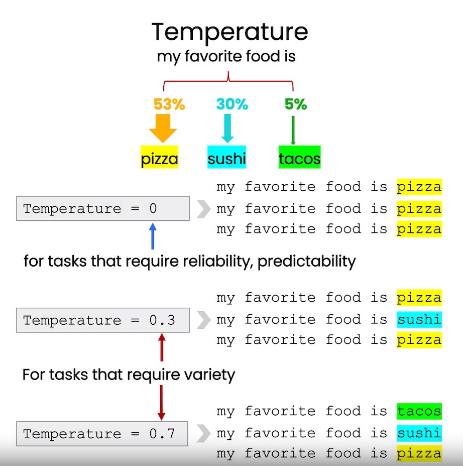

### Note: 
Temperature allows you to vary the kind of degree of exploration and variety in 
the kind of models responses.

<b> Example 1 Temperature = 0  </b>


In [5]:
prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for \
their review.
If the sentiment is negative, apologize and suggest that \
they can reach out to customer service. 
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""
# response = get_completion(prompt, temperature=0)
# print(response)

<b>Output</b>

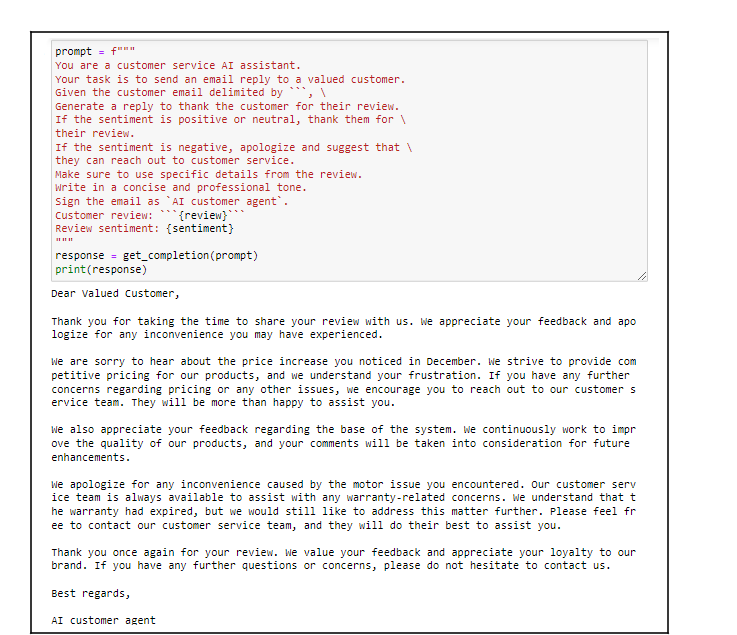

Same response as above exampla because there temperature was also zero


<b> Example 2 Temperature = 0.3  </b>


In [9]:
prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for \
their review.
If the sentiment is negative, apologize and suggest that \
they can reach out to customer service. 
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""
# response = get_completion(prompt, temperature=0.3)
# print(response)

<b>Output</b>

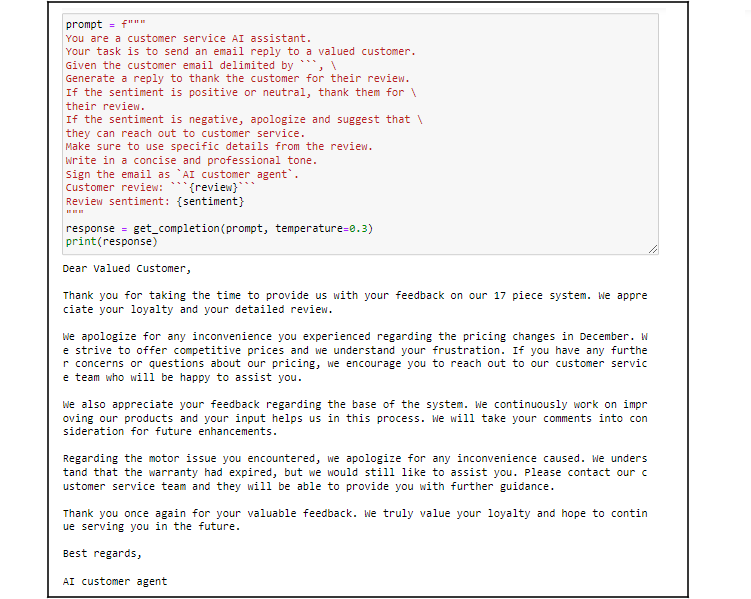

<b> Example 3 Temperature = 0.7  </b>


In [10]:
prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for \
their review.
If the sentiment is negative, apologize and suggest that \
they can reach out to customer service. 
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""
# response = get_completion(prompt, temperature=0.7)
# print(response)

<b>Output</b>

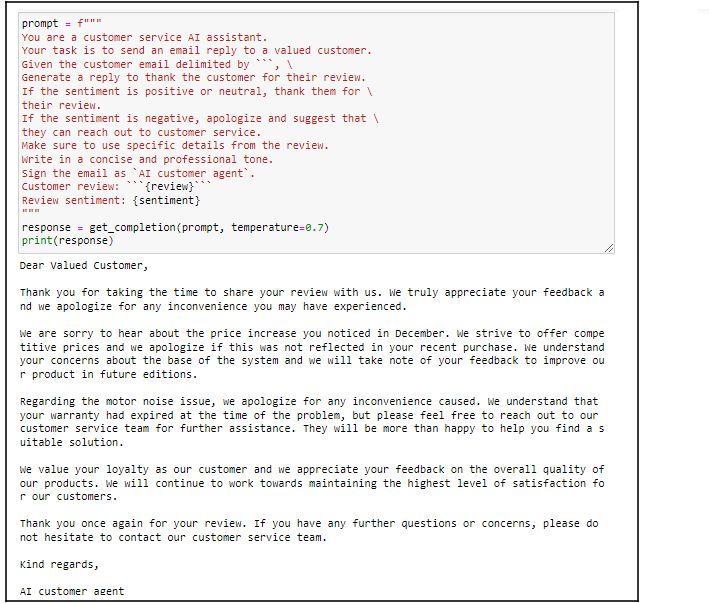

In general, when building applications 
where you want a kind of predictable response, 
I would recommend using temperature zero. 

If you're trying to build a system that is 
reliable and predictable, you should go with 0. If you're trying to 
kind of use the model in a more creative way where you 
might kind of want 
a kind of wider variety of different outputs, 
you might want to use a higher temperature.

So, to summarise, at higher temperatures, 
the outputs from the model are kind of more random. 
You can almost think of it as that at higher temperatures, 
the assistant is more distractible, but maybe more creative. 

## Try experimenting on your own!

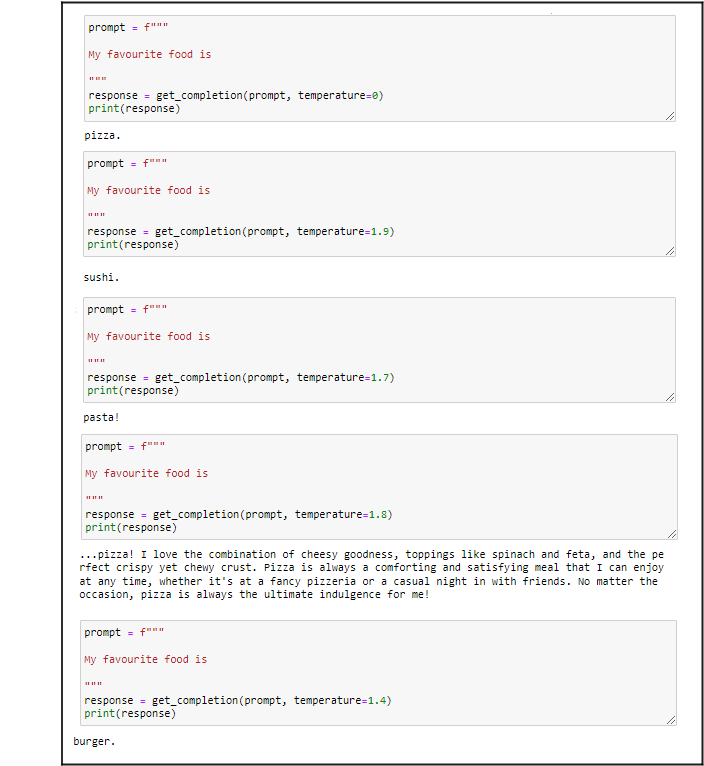